In [32]:
!uv pip install opencv-python opencv-python-headless

Audited 2 packages in 6ms


In [33]:
import cv2
import os
import numpy as np
from tqdm import tqdm
from pathlib import Path

def extract_frames_by_seconds(video_path, output_dir, seconds_interval=1):
    """
    Extract frames from a video file at specified time intervals.
    
    Args:
        video_path (Path or str): Path to the video file
        output_dir (Path or str): Directory to save extracted frames
        seconds_interval (float): Extract a frame every n seconds
    """
    # Convert to Path objects if they aren't already
    video_path = Path(video_path)
    output_dir = Path(output_dir)
    
    # Create output directory if it doesn't exist
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Open the video file
    video = cv2.VideoCapture(str(video_path))
    
    # Get video properties
    fps = video.get(cv2.CAP_PROP_FPS)
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / fps
    
    print(f"Video: {video_path}")
    print(f"FPS: {fps}")
    print(f"Frame count: {frame_count}")
    print(f"Duration: {duration:.2f} seconds")
    
    # Calculate frame interval based on seconds
    frame_interval = int(fps * seconds_interval)
    
    # Extract frames
    frame_idx = 0
    saved_count = 0
    image_prefix = Path(video_path).stem

    
    for _ in tqdm(range(frame_count), desc="Extracting frames"):
        ret, frame = video.read()
        if not ret:
            break
            
        if frame_idx % frame_interval == 0:
            # Calculate the timestamp in seconds
            timestamp = frame_idx / fps
            
            # Check if the image is mostly black
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            brightness = np.mean(gray)
            
            # Only save if the image is not too dark, it's every 5th frame, and skip the first frame
            if brightness > 10 and saved_count % 5 == 0 and saved_count > 0:  # Threshold can be adjusted
                frame_path = output_dir / f"{image_prefix}_frame_{saved_count:06d}s.jpg"
                cv2.imwrite(str(frame_path), frame)
            saved_count += 1
        frame_idx += 1
    
    video.release()
    print(f"Extracted {saved_count} frames to {output_dir} (one frame every {seconds_interval} second(s))")

# Process all videos in the video directory
video_dir = Path("video")  # Directory containing video files
output_dir = Path("data/images")  # Directory to save extracted frames

# Create output directory if it doesn't exist
output_dir.mkdir(parents=True, exist_ok=True)

# Get all video files in the directory
video_extensions = ['.mp4', '.avi', '.mkv', '.mov']
video_files = [f for f in video_dir.iterdir() if f.is_file() and 
               any(f.name.lower().endswith(ext) for ext in video_extensions)]

print(f"Found {len(video_files)} video files in {video_dir}")

# Process each video file
for video_path in video_files:
    # Create a subdirectory for each video using the video filename
    video_output_dir = output_dir
    
    print(f"\nProcessing video: {video_path.name}")
    # Extract one frame every 1 second
    extract_frames_by_seconds(video_path, video_output_dir, seconds_interval=1)


Found 10 video files in video

Processing video: Movie_7.mkv
Video: video/Movie_7.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:02<00:00, 207.21it/s]


Extracted 61 frames to data/images (one frame every 1 second(s))

Processing video: Movie_6.mkv
Video: video/Movie_6.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:02<00:00, 221.94it/s]


Extracted 61 frames to data/images (one frame every 1 second(s))

Processing video: Movie_4.mkv
Video: video/Movie_4.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:02<00:00, 219.45it/s]


Extracted 61 frames to data/images (one frame every 1 second(s))

Processing video: Movie_5.mkv
Video: video/Movie_5.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:02<00:00, 221.91it/s]


Extracted 61 frames to data/images (one frame every 1 second(s))

Processing video: Movie_1.mkv
Video: video/Movie_1.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:02<00:00, 214.17it/s]


Extracted 61 frames to data/images (one frame every 1 second(s))

Processing video: Movie_2.mkv
Video: video/Movie_2.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:02<00:00, 224.99it/s]


Extracted 61 frames to data/images (one frame every 1 second(s))

Processing video: Movie_3.mkv
Video: video/Movie_3.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:02<00:00, 224.63it/s]


Extracted 61 frames to data/images (one frame every 1 second(s))

Processing video: Movie_10.mkv
Video: video/Movie_10.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:02<00:00, 227.21it/s]


Extracted 61 frames to data/images (one frame every 1 second(s))

Processing video: Movie_8.mkv
Video: video/Movie_8.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:02<00:00, 217.29it/s]


Extracted 61 frames to data/images (one frame every 1 second(s))

Processing video: Movie_9.mkv
Video: video/Movie_9.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:02<00:00, 224.85it/s]

Extracted 61 frames to data/images (one frame every 1 second(s))


In [34]:
!uv pip install ultralytics inference'[yolo-world]' "git+https://github.com/openai/CLIP.git"

Resolved 145 packages in 1.38s                                       
Audited 145 packages in 0.10ms


In [35]:
from ultralytics import YOLO
from inference.models.yolo_world.yolo_world import YOLOWorld
import supervision as sv
import cv2

# Initialize a YOLO-World model
model = YOLOWorld(model_id='yolo_world/v2-x')  # or select yolov8m/l-world.pt

Creating inference sessions


CLIP model loaded in 2.35 seconds


2025-04-29 01:34:20.621505 [W:onnxruntime:, coreml_execution_provider.cc:112 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 17 number of nodes in the graph: 985 number of nodes supported by CoreML: 43
2025-04-29 01:34:22.622357 [W:onnxruntime:, helper.cc:83 IsInputSupported] CoreML does not support input dim > 16384. Input:token_embedding.weight, shape: {49408,512}
2025-04-29 01:34:22.622655 [W:onnxruntime:, coreml_execution_provider.cc:112 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 15 number of nodes in the graph: 1003 number of nodes supported by CoreML: 32


In [39]:
def process_images_with_yolo_world(image_input_dir, labels_output_dir, classes=["pig", "person"], confidence_threshold=0.1):
    """
    Process images with YOLO-World model and save detection results in YOLO format.
    
    Args:
        image_input_dir (str): Directory containing input images
        labels_output_dir (str): Directory to save output labels
        classes (list): List of classes to detect
        confidence_threshold (float): Confidence threshold for detections
    """
    import os
    from pathlib import Path
    import glob
    from tqdm import tqdm
    import cv2
    import supervision as sv
    from ultralytics import YOLO
    from inference.models.yolo_world.yolo_world import YOLOWorld
    
    # Create labels directory if it doesn't exist
    os.makedirs(labels_output_dir, exist_ok=True)
    
    # Initialize a YOLO-World model
    model = YOLOWorld(model_id='yolo_world/v2-x')
    
    # Set classes for the model
    model.set_classes(classes)
    
    # Get all image files in the directory
    image_files = glob.glob(f"{image_input_dir}/*.jpg") + glob.glob(f"{image_input_dir}/*.png")
    print(f"Found {len(image_files)} images to process")
    
    # Process each image with progress bar
    for image_path in tqdm(image_files, desc="Processing images", unit="image"):
        # Get base filename without extension
        base_name = os.path.basename(image_path).split('.')[0]
        
        # Run inference on the image
        results = model.infer(image_path, text=classes, confidence=confidence_threshold)
        
        # Convert detections to YOLO format and save to txt file
        detections = sv.Detections.from_inference(results)
        
        # Create label file path
        label_path = os.path.join(labels_output_dir, f"{base_name}.txt")
        
        # Open file for writing
        with open(label_path, 'w') as f:
            if len(detections.xyxy) > 0:
                # Get image dimensions for normalization
                img = cv2.imread(image_path)
                img_height, img_width = img.shape[:2]
                
                # Write each detection to file in YOLO format: class x_center y_center width height
                for i in range(len(detections.xyxy)):
                    x1, y1, x2, y2 = detections.xyxy[i]
                    class_id = detections.class_id[i]
                    
                    # Write to file
                    f.write(f"{class_id} {x1} {y1} {x2} {y2}\n")
        
        # Create mock directory for visualization
        mock_dir = os.path.join(os.path.dirname(labels_output_dir), "mock")
        os.makedirs(mock_dir, exist_ok=True)
        
        # Save annotated image for visualization
        img = cv2.imread(image_path)
        bounding_box_annotator = sv.BoxAnnotator()
        label_annotator = sv.LabelAnnotator()
        
        labels = [classes[class_id] for class_id in detections.class_id]
        
        annotated_image = bounding_box_annotator.annotate(
            scene=img, detections=detections
        )
        annotated_image = label_annotator.annotate(
            scene=annotated_image, detections=detections, labels=labels
        )
        
        # Save annotated image
        cv2.imwrite(os.path.join(mock_dir, f"{base_name}_annotated.jpg"), annotated_image)
    
    print(f"Completed processing {len(image_files)} images. Labels saved to {labels_output_dir}/")

# Example usage:
# process_images_with_yolo_world("data/images", "data/labels")

In [40]:
# Split the dataset into train and test sets
import random
import shutil
import glob
# Define the split ratio (e.g., 80% train, 20% test)
train_ratio = 0.8
test_ratio = 1 - train_ratio

image_dir = "data/images"
image_files = glob.glob(f"{image_dir}/*.jpg") + glob.glob(f"{image_dir}/*.png")

# Create train and test directories
# Clean existing directories if they exist
train_images_dir = os.path.join(os.path.dirname(image_dir), "train", "images")
train_labels_dir = os.path.join(os.path.dirname(image_dir), "train", "labels")
test_images_dir = os.path.join(os.path.dirname(image_dir), "val", "images")
test_labels_dir = os.path.join(os.path.dirname(image_dir), "val", "labels")

# Remove existing directories if they exist
for directory in [train_images_dir, train_labels_dir, test_images_dir, test_labels_dir]:
    if os.path.exists(directory):
        print(f"Cleaning existing directory: {directory}")
        shutil.rmtree(directory)

# Create directories if they don't exist
for directory in [train_images_dir, train_labels_dir, test_images_dir, test_labels_dir]:
    os.makedirs(directory, exist_ok=True)

# Shuffle the image files to ensure random distribution
random.shuffle(image_files)

# Calculate split indices
split_idx = int(len(image_files) * train_ratio)
train_files = image_files[:split_idx]
test_files = image_files[split_idx:]

print(f"Splitting dataset: {len(train_files)} training images, {len(test_files)} validation images")

# Copy files to train and test directories
for file_list, img_dir, lbl_dir in [(train_files, train_images_dir, train_labels_dir), 
                                   (test_files, test_images_dir, test_labels_dir)]:
    for img_path in file_list:
        # Get base filename without extension
        base_name = os.path.splitext(os.path.basename(img_path))[0]
        
        # Copy image file
        shutil.copy(img_path, os.path.join(img_dir, os.path.basename(img_path)))
        
        # Copy corresponding label file if it exists
        label_path = os.path.join(os.path.dirname(image_dir), "labels", f"{base_name}.txt")
        if os.path.exists(label_path):
            shutil.copy(label_path, os.path.join(lbl_dir, f"{base_name}.txt"))

print("Dataset split complete.")

# Process images with YOLO World for both train and validation sets
print("Processing training images...")
process_images_with_yolo_world(train_images_dir, train_labels_dir)

print("Processing validation images...")
process_images_with_yolo_world(test_images_dir, test_labels_dir)

print("All processing complete!")



Cleaning existing directory: data/train/images
Cleaning existing directory: data/train/labels
Cleaning existing directory: data/val/images
Cleaning existing directory: data/val/labels
Splitting dataset: 96 training images, 24 validation images
Dataset split complete.
Processing training images...
Creating inference sessions


2025-04-29 01:42:02.680605 [W:onnxruntime:, coreml_execution_provider.cc:112 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 17 number of nodes in the graph: 985 number of nodes supported by CoreML: 43
2025-04-29 01:42:04.006745 [W:onnxruntime:, helper.cc:83 IsInputSupported] CoreML does not support input dim > 16384. Input:token_embedding.weight, shape: {49408,512}
2025-04-29 01:42:04.007000 [W:onnxruntime:, coreml_execution_provider.cc:112 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 15 number of nodes in the graph: 1003 number of nodes supported by CoreML: 32


CLIP model loaded in 1.61 seconds
Found 96 images to process


Processing images: 100%|██████████| 96/96 [00:42<00:00,  2.25image/s]
2025-04-29 01:42:47.087407 [W:onnxruntime:, coreml_execution_provider.cc:112 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 17 number of nodes in the graph: 985 number of nodes supported by CoreML: 43
2025-04-29 01:42:48.150252 [W:onnxruntime:, helper.cc:83 IsInputSupported] CoreML does not support input dim > 16384. Input:token_embedding.weight, shape: {49408,512}
2025-04-29 01:42:48.150528 [W:onnxruntime:, coreml_execution_provider.cc:112 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 15 number of nodes in the graph: 1003 number of nodes supported by CoreML: 32


Completed processing 96 images. Labels saved to data/train/labels/
Processing validation images...
Creating inference sessions
CLIP model loaded in 1.34 seconds
Found 24 images to process


Processing images: 100%|██████████| 24/24 [00:09<00:00,  2.47image/s]

Completed processing 24 images. Labels saved to data/val/labels/
All processing complete!


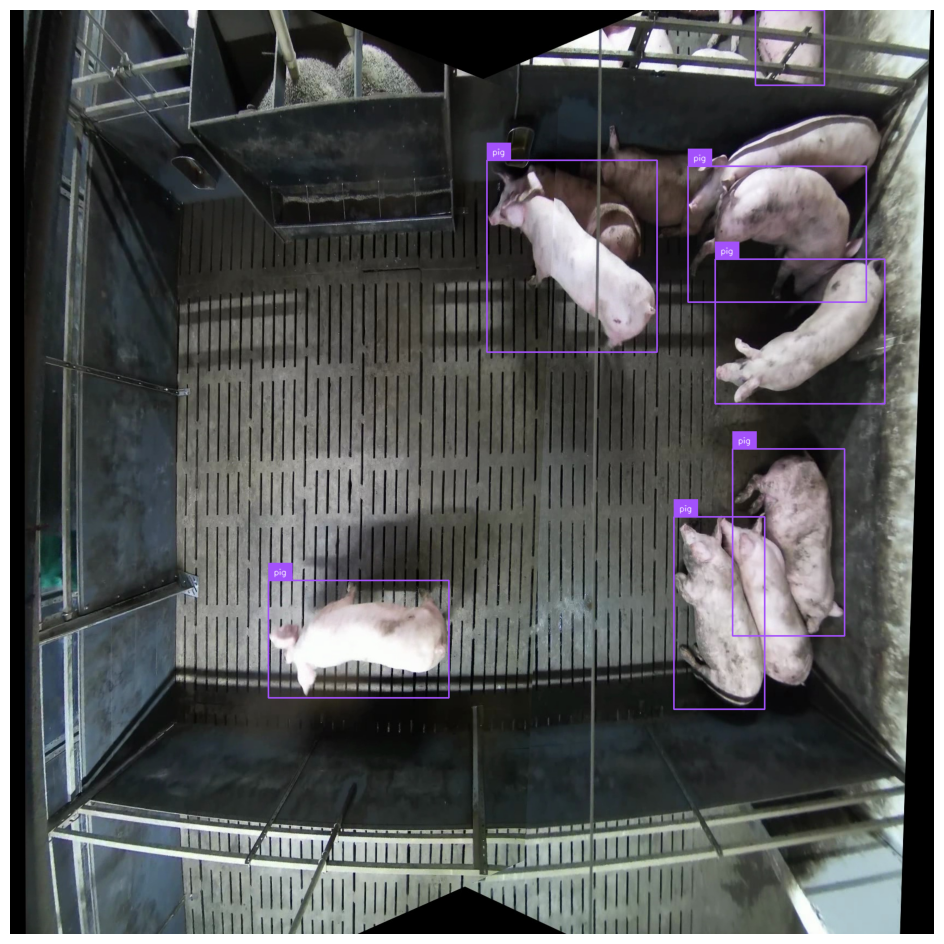

In [38]:
image = cv2.imread(image_path)

detections = sv.Detections.from_inference(results)

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [classes[class_id] for class_id in detections.class_id]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections
)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels
)

sv.plot_image(annotated_image)